In [19]:
%matplotlib inline

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
grants = pd.read_csv("DiscGrants96to13.csv", encoding = "ISO-8859-1")
grants.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN


In [22]:
grants.tail()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
13213,MA-01-05-0003-05,California Indian Museum and Cultural Center,Museums for America,MA,Storytelling Technology Outreach and Real-Time...,MFA-Sustaining Cultural Heritage,6/29/2005,5250 Aero Drive,NaN,NaN,...,-122.764631,6.0,97.0,152702.0,4027.0,92940.0,40426.0,42220.0,NaN,"The goal of the STORIE project is to preserve,..."
13214,MA-02-06-0434-06,"Gifford Arboretum, University of Miami",Museums for America,MA,Lifelong Learning Project Needs Created by the...,MFA-Supporting Lifelong Learning,3/13/2006,1204 Dickenson Drive,Bldg 37A,NaN,...,-80.280045,12.0,86.0,980300.0,1005.0,92158.0,14250.0,33100.0,33124.0,The goal of this project is to enhance the edu...
13215,LG-06-09-0198-09,"Regents of the University of California, Lawre...",National Leadership Grants,LG,Advancing Optical Scanning of Mechanical Sound...,NLG Library Research,9/24/2009,One Cyclotron Rd.,MS:50B5239,NaN,...,-122.242310,6.0,1.0,400100.0,1016.0,92230.0,53000.0,41860.0,36084.0,"Working with the Library of Congress, Lawrence..."
13216,MA-02-06-0439-06,Louisiana Museum Foundation,Museums for America,MA,Louisiana State Museum Educational Development...,MFA-Supporting Lifelong Learning,3/13/2006,1000 Bourbon Street,#B429,NaN,...,-90.063092,22.0,71.0,3800.0,1018.0,98000.0,55000.0,35380.0,NaN,The Louisiana State Museum seeks to provide un...
13217,MA-03-06-0437-06,Contemporary Arts Center,Museums for America,MA,Rebuilding and Renewal of the Arts in New Orleans,MFA-Serving as Centers of Community Engagement,3/13/2006,900 Camp Street,NaN,NaN,...,-90.070977,22.0,71.0,13400.0,2093.0,98000.0,55000.0,35380.0,NaN,We will hire a Consultant to study the new pop...


In [23]:
institutions = pd.DataFrame(grants["Institution"])
institutions

,Institution
0,Museum of the Aleutians
1,"Depot Museum, Inc."
2,National Voting Rights Museum and Institute
3,Bob Jones Museum
4,Coronado Museum of History and Art
5,Hayward Area Historical Society Museum
6,Sun Gallery
7,Coachella Valley Historical Society
8,Los Gatos Museum
9,Gold Nugget Museum


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e9a9b2860>]], dtype=object)

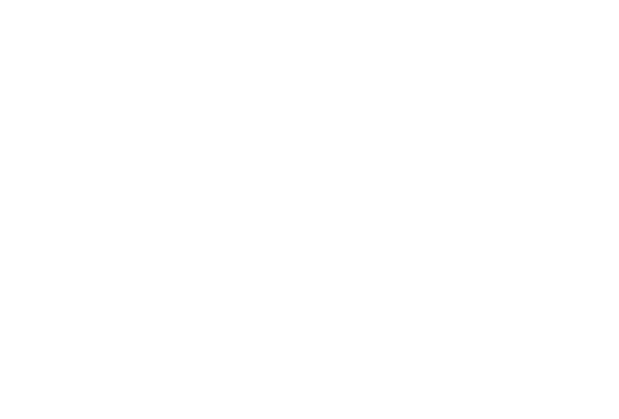

In [24]:
institutions.hist(layout=(1,1))

In [25]:
programs = pd.DataFrame(grants["Program"])
stats = programs.stack().value_counts()
stats

Native American Library Service    2681
Museum Assessment Program          1731
Museums for America                1673
Conservation Assessment Prog.      1397
General Operating Support          1299
Conservation Program               1121
Native American Basic Grants        846
National Leadership Grants          810
Librarians for the 21st Century     388
Native American Native Hawaiian     220
Native Amer. Tech. Assistance       198
Learning Opportunities Grants       168
Professional Practices              102
National Leadership Grants (LL)      97
Museum Grants African American       91
Save America's Treasures             71
21st Century Museum Professiona      64
Museum Leadership Initiatives        57
Native Am. Enhancement Grants        51
NLG/Museum Library Collab            30
NLG/Preserv or Digitization          29
NLG/Education and Training           23
National Leadership Grants - Mu      18
NLG/Research and Demo                17
NLG/Technology & Mus. On Line        13


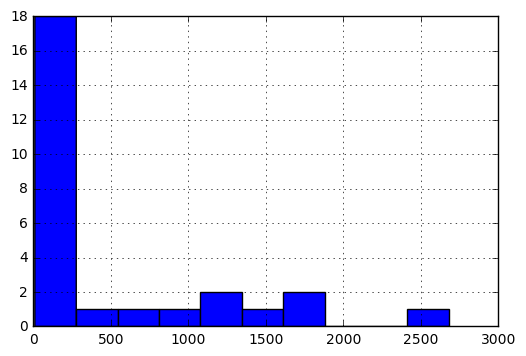

In [26]:
stats.hist()

In [27]:
s = programs.groupby("Program").ids.agg(lambda x:len(x.unique()))
pd.value_counts(s).plot(kind="bar")

AttributeError: 'DataFrameGroupBy' object has no attribute 'ids'

In [ ]:
#grants.groupby([grants.index.date, 'action']).count().plot(kind='bar')
grants.groupby([grants.index, 'Program']).count().plot(kind='bar')

In [ ]:
grants.head()

In [28]:
list(grants)

['LogNumber',
 'Institution',
 'Program',
 'ProgramType',
 'ProjectTitle',
 'ProjectType',
 'AwardDate',
 'InstAddr1',
 'InstAddr2',
 'InstAddr3',
 'InstCity',
 'InstState',
 'InstZip',
 'AwardOrig',
 'AwardTotal',
 'AppMatchAmount',
 'ReqAwardAmount',
 'ReqMatchAmount',
 'Prefix',
 'FirstName',
 'LastName',
 'OrgType',
 'FiscalYear',
 'AwardPeriodFr',
 'AwardPeriodTo',
 'OrgUnit',
 'OUAddr1',
 'OUAddr2',
 'OUAddr3',
 'OUCity',
 'OUState',
 'OUZip',
 'Latitude',
 'Longitude',
 'FIPSState',
 'FIPSCounty',
 'CensusTract',
 'CensusBlock',
 'FIPSMCDCode',
 'FIPSPlaceCode',
 'CBSACode',
 'MetroDivisionCode',
 'Description']

In [29]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Let's get the number of grants per state. For starters, we do the simple case of typing the state initials manually.

In [35]:
def f(x):
    df = grants.loc[grants['InstState'] == x]
    return len(df.index)

In [38]:
grants['InstState'].unique()

array(['AK', 'AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP',
       'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'PR', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'AR', 'IA', 'ND', 'RI', 'DE', 'LA', 'WY', 'VI', 'GU',
       'AS', nan, 'FM', 'PW', 'MH'], dtype=object)

In [36]:
interact(f, x="NY");

0